In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('Downloads/data.xlsx')

In [768]:
data

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [769]:
# посмотрим на файл, выполним предобработку

In [770]:
# посмотрим на тип и количество данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [771]:
# посмотрим количество пропущенных значений
data.isnull().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
Unnamed: 5        730
document           21
receiving_date    123
dtype: int64

In [772]:
# посмотрим количество уникальных значений
data.nunique()

client_id         212
sum               504
status             11
sale               12
new/current         3
Unnamed: 5          0
document            3
receiving_date    111
dtype: int64

In [773]:
# посмотрим статистические данные числовых столбцов
data.describe()

,client_id,sum,Unnamed: 5
count,724.000000,724.000000,0.0
mean,183.084254,7162.542030,NaN
std,106.590761,6308.571297,NaN
min,6.000000,23.700000,NaN
25%,86.000000,3114.732500,NaN
50%,194.000000,5207.990000,NaN
75%,273.000000,8934.950000,NaN
max,398.000000,39713.500000,NaN


In [774]:
# предобработаем данные 

In [775]:
# уберем лишний столбец
data = data.drop('Unnamed: 5', axis=1)

In [776]:
# сделаем отдельный столбец для обозначения месяца

# посмотрим какие есть статусы в колонке статус
data['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [777]:
# сделаем отдельную колонку с месяцами
valid_statuses = ['ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ', 'НА ПОДПИСАНИИ']
current_month = None
for idx, row in data.iterrows():
    if row.status in valid_statuses:
        data.loc[idx, 'month'] = current_month
    else:
        current_month = row.status
data

,client_id,sum,status,sale,new/current,document,receiving_date,month
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021


In [778]:
# и уберем строки, которые фиксировали месяц
data = data[data['month'].notna()]
data

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021


In [779]:
july_return = round(data[(data['month'] == 'Июль 2021') & (data['status'] != 'ПРОСРОЧЕНО')]['sum'].sum(), 2)
print(f'Общая выручка за июль 2021 по тем сделкам, приход денежных средств которых не просрочен равна {july_return}.')

Общая выручка за июль 2021 по тем сделкам, приход денежных средств которых не просрочен равна 859896.47.


In [780]:
# нам понадобится перевести месяца из формата строки в формат даты, locale не заработал, поэтому через словарь буду делать
months = {
    'Май 2021': pd.to_datetime('2021-05-01'), 
    'Июнь 2021': pd.to_datetime('2021-06-01'), 
    'Июль 2021': pd.to_datetime('2021-07-01'), 
    'Август 2021': pd.to_datetime('2021-08-01'), 
    'Сентябрь 2021': pd.to_datetime('2021-09-01'), 
    'Октябрь 2021': pd.to_datetime('2021-10-01')
}

In [781]:
# сделаем таблицу выручки по месяцам
sales_by_month = data.groupby(['month']).agg({'sum':'sum'}).round().reset_index()
sales_by_month['month_date'] = sales_by_month['month'].apply(lambda x: months[x])
sales_by_month = sales_by_month.sort_values('month_date').set_index('month_date')
sales_by_month

,month,sum
month_date,,
2021-05-01,Май 2021,809572.0
2021-06-01,Июнь 2021,810266.0
2021-07-01,Июль 2021,861874.0
2021-08-01,Август 2021,850436.0
2021-09-01,Сентябрь 2021,820384.0
2021-10-01,Октябрь 2021,1033148.0


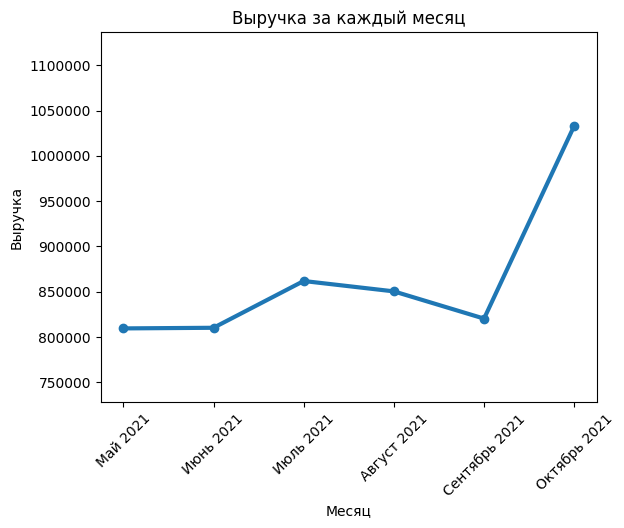

In [782]:
# построим график
plt.plot(sales_by_month['month'], sales_by_month['sum'], linewidth= 3,  marker='o', linestyle='-')

plt.title('Выручка за каждый месяц')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.ylim(min(sales_by_month['sum'])*0.9, max(sales_by_month['sum'])*1.1)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [783]:
# составим таблицу сколько каждый менеджер заработал
all_man_september = data[data['month'] == 'Сентябрь 2021'].groupby('sale').agg({'sum':'sum'}).sort_values('sum', ascending = False).reset_index()
all_man_september

,sale,sum
0,Смирнов,221525.70
1,Петрова,149344.46
2,Андреев,133652.50
3,Иванов,94770.60
4,Кузнецова,72228.40
5,Филимонова,59514.47
6,Васильев,49895.45
7,Соколов,35183.50
8,Михайлов,4268.70


In [784]:
top_man_september = all_man_september['sale'][0]
print(f'Больше всего денежных средств в сентябре 2021 привлек {top_man_september}.')

Больше всего денежных средств в сентябре 2021 привлек Смирнов.


In [785]:
# сгруппируем таблицу по типу сделок
october_deals_sum = data[data['month'] == 'Октябрь 2021']['new/current'].value_counts().sort_values(ascending = False).reset_index()
october_deals_sum

,new/current,count
0,текущая,99
1,новая,36


In [786]:
most_common_type = october_deals_sum['new/current'][0]
print(f'В октябре 2021 преобладающик тип сделки был "{most_common_type}".')

В октябре 2021 преобладающик тип сделки был "текущая".


In [787]:
orig_doc_jun = data[(data['month'] == 'Май 2021') # майские сделки
                & (pd.to_datetime(data['receiving_date'], errors='coerce', format='%Y-%m-%d') >= pd.to_datetime('2021-06-01')) # от начала июня до конца
                & (pd.to_datetime(data['receiving_date'], errors='coerce', format='%Y-%m-%d') < pd.to_datetime('2021-07-01'))].shape[0]
print(f'В июне 2021 было получено {orig_doc_jun} оригиналов договора по майским сделкам.')


В июне 2021 было получено 77 оригиналов договора по майским сделкам.


In [788]:
# оставим в таблице только интересующие нас месяцы
new_data = data.loc[data['month'].isin(['Май 2021', 'Июнь 2021'])]
new_data.insert(2, 'rest', 0)
new_data['month_date'] = new_data['month'].apply(lambda x: months[x])
new_data

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_45117/1193266158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['month_date'] = new_data['month'].apply(lambda x: months[x])


,client_id,sum,rest,status,sale,new/current,document,receiving_date,month,month_date
1,6.0,11693.7,0,ВНУТРЕННИЙ,-,-,-,-,Май 2021,2021-05-01
2,14.0,5452.7,0,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,2021-05-01
3,15.0,13991.7,0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,2021-05-01
4,16.0,719.7,0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,2021-05-01
5,18.0,4253.7,0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
253,281.0,5733.7,0,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,2021-06-01
254,282.0,953.7,0,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Июнь 2021,2021-06-01
255,284.0,8823.7,0,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00,Июнь 2021,2021-06-01
256,286.0,3453.7,0,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,2021-06-01


In [789]:
# За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.
# 1) За новые сделки менеджер получает 7 % от суммы, при условии, 
# что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).


# для новых: найти строки == оплачено и оригинала нет до 1 июля 
new_data_1 = new_data[
            (new_data['new/current'] == 'новая') # выбираем новые сделки
            & (new_data['status'] == 'ОПЛАЧЕНО') # оплаченные
            & (pd.to_datetime(new_data['receiving_date'], errors='coerce', format='%Y-%m-%d') > '2021-07-01') # но при этом оригинал после июня, так как нам надо найти на 1 июля
            ]
new_data_1

,client_id,sum,rest,status,sale,new/current,document,receiving_date,month,month_date
2,14.0,5452.7,0,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,2021-05-01
43,83.0,8763.7,0,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13 00:00:00,Май 2021,2021-05-01
44,84.0,3558.7,0,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13 00:00:00,Май 2021,2021-05-01
45,85.0,9083.7,0,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13 00:00:00,Май 2021,2021-05-01
125,281.0,4488.7,0,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Май 2021,2021-05-01
130,316.0,35653.7,0,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-08-09 00:00:00,Июнь 2021,2021-06-01
139,31.0,6523.7,0,ОПЛАЧЕНО,Филимонова,новая,оригинал,2021-10-12 00:00:00,Июнь 2021,2021-06-01
142,36.0,3868.7,0,ОПЛАЧЕНО,Филимонова,новая,оригинал,2021-07-08 00:00:00,Июнь 2021,2021-06-01
168,77.0,16653.7,0,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-06 00:00:00,Июнь 2021,2021-06-01
169,290.0,18453.7,0,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-06 00:00:00,Июнь 2021,2021-06-01


In [790]:
# посчитаем остаток
new_data_1['rest'] = new_data_1['sum'] * 0.07
new_data_1

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_45117/1020559462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_1['rest'] = new_data_1['sum'] * 0.07


,client_id,sum,rest,status,sale,new/current,document,receiving_date,month,month_date
2,14.0,5452.7,381.689,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,2021-05-01
43,83.0,8763.7,613.459,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13 00:00:00,Май 2021,2021-05-01
44,84.0,3558.7,249.109,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13 00:00:00,Май 2021,2021-05-01
45,85.0,9083.7,635.859,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13 00:00:00,Май 2021,2021-05-01
125,281.0,4488.7,314.209,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Май 2021,2021-05-01
130,316.0,35653.7,2495.759,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-08-09 00:00:00,Июнь 2021,2021-06-01
139,31.0,6523.7,456.659,ОПЛАЧЕНО,Филимонова,новая,оригинал,2021-10-12 00:00:00,Июнь 2021,2021-06-01
142,36.0,3868.7,270.809,ОПЛАЧЕНО,Филимонова,новая,оригинал,2021-07-08 00:00:00,Июнь 2021,2021-06-01
168,77.0,16653.7,1165.759,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-06 00:00:00,Июнь 2021,2021-06-01
169,290.0,18453.7,1291.759,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-06 00:00:00,Июнь 2021,2021-06-01


In [791]:
# 2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. 
# При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», 
# а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).

# для текущих: найти строки != просрочено и оригинала нет до 1 июля

new_data_2 = new_data[
        (new_data['new/current'] == 'текущая') # текущие сделки
        & (new_data['status'] != 'ПРОСРОЧЕНО') # все кроме просрочено
        & (pd.to_datetime(new_data['receiving_date'], errors='coerce', format='%Y-%m-%d') > '2021-07-01') # оригинал после 1 июля
]
new_data_2

,client_id,sum,rest,status,sale,new/current,document,receiving_date,month,month_date
5,18.0,4253.70,0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,2021-05-01
6,20.0,5796.70,0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,Май 2021,2021-05-01
7,21.0,3613.70,0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13 00:00:00,Май 2021,2021-05-01
12,32.0,7353.90,0,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00,Май 2021,2021-05-01
13,34.0,3892.52,0,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00,Май 2021,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
251,273.0,10133.70,0,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-06 00:00:00,Июнь 2021,2021-06-01
252,277.0,4798.70,0,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08 00:00:00,Июнь 2021,2021-06-01
253,281.0,5733.70,0,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,2021-06-01
256,286.0,3453.70,0,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,2021-06-01


In [792]:
# посчитаем остаток
new_data_2['rest'] = new_data_2.apply(lambda x: x['sum'] * 0.05 if x['sum'] >= 10000 else x['sum'] * 0.03, axis=1) 
new_data_2

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_45117/360819064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_2['rest'] = new_data_2.apply(lambda x: x['sum'] * 0.05 if x['sum'] >= 10000 else x['sum'] * 0.03, axis=1)


,client_id,sum,rest,status,sale,new/current,document,receiving_date,month,month_date
5,18.0,4253.70,127.6110,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,2021-05-01
6,20.0,5796.70,173.9010,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,Май 2021,2021-05-01
7,21.0,3613.70,108.4110,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13 00:00:00,Май 2021,2021-05-01
12,32.0,7353.90,220.6170,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00,Май 2021,2021-05-01
13,34.0,3892.52,116.7756,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09 00:00:00,Май 2021,2021-05-01
...,...,...,...,...,...,...,...,...,...,...
251,273.0,10133.70,506.6850,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-06 00:00:00,Июнь 2021,2021-06-01
252,277.0,4798.70,143.9610,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08 00:00:00,Июнь 2021,2021-06-01
253,281.0,5733.70,172.0110,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,2021-06-01
256,286.0,3453.70,103.6110,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,2021-06-01


In [793]:
new_data = pd.concat([new_data_1, new_data_2])

In [794]:
rest_all_managers = new_data.groupby('sale').agg({'rest': 'sum'}).sort_values('rest')
rest_all_managers

,rest
sale,
Соколов,269.2110
Васильев,1037.0490
Филимонова,2317.9579
Андреев,3866.3687
Кузнецова,4496.9501
Селиванов,5297.6900
Иванов,5778.7910
Смирнов,7127.2680
Петрова,10770.7474
